3. (Numerical) Implement the simple Euler algorithm for estimating the solution x(t) of
a given single ODE dx/dt = f(x, t). For each of the following three ODEs, derive an
analytical solution and validate your Euler implementation against it by integrating from
t = 0 to t = 3:
• dx/dt = 1, with x(0) = 0,
• dx/dt = 2t, with x(0) = −4
• dx/dt = −x, with x(0) = 4
Experiment with different values for the time step, ∆t = 1, ∆t = 0.1 and ∆t = 0.01. Do
this by plotting both the analytical solution and the numerical approximation in the same
figure. For which equation(s) does your result improve? For bonus: do the same for the
second order Runge-Kutta method.
You now have a (crude) tool with which you can later check your analytical results.

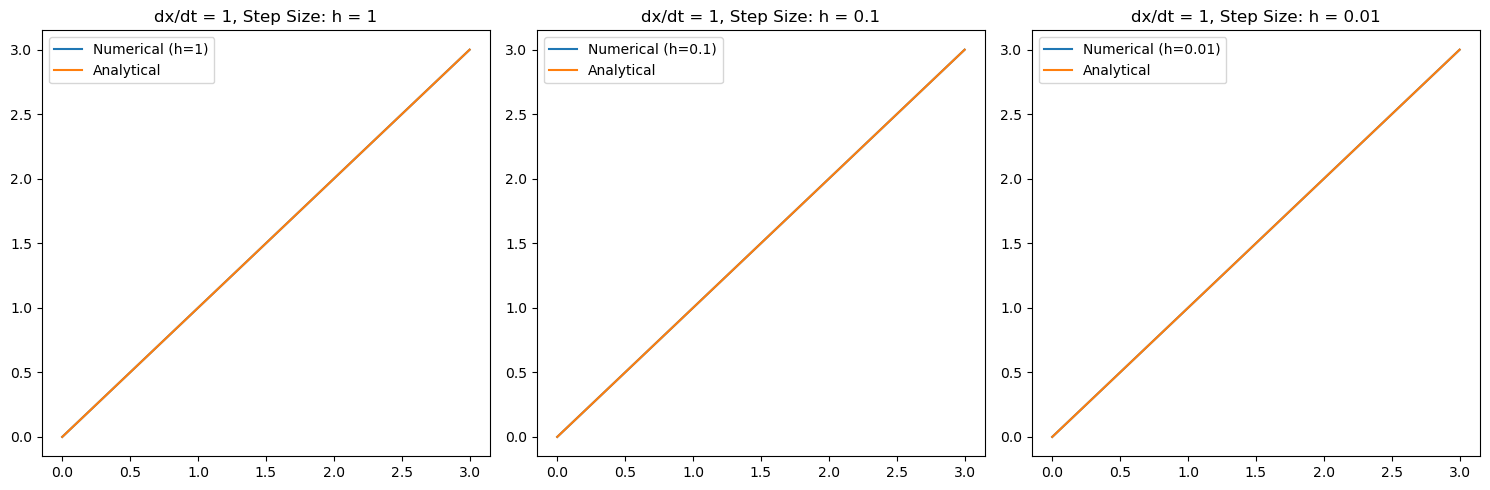

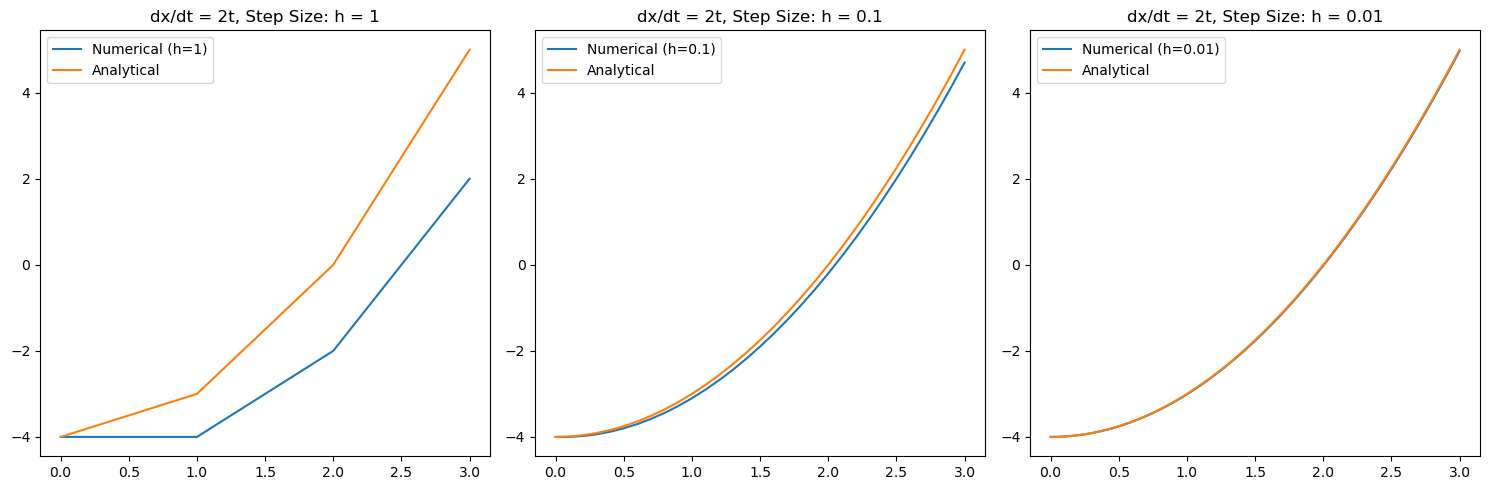

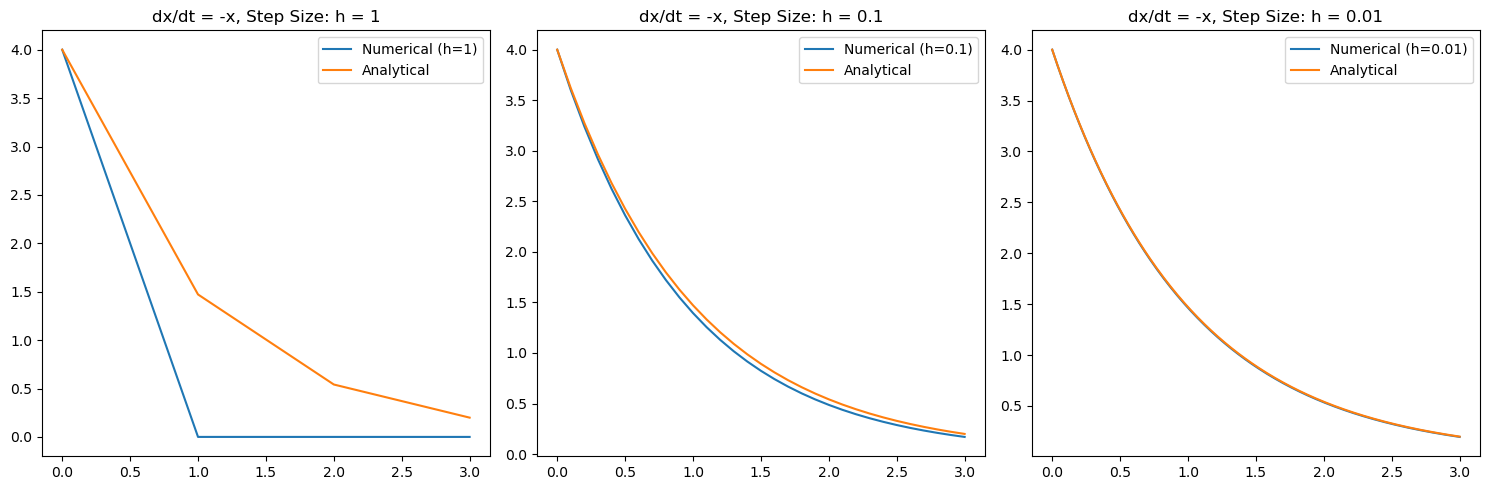

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, x0, t0, T, h):
    t_values = np.arange(t0, T + h, h)
    x_values = np.zeros_like(t_values)

    # initial condition
    x_values[0] = x0

    # Euler method
    for i in range(1, len(t_values)):
        x_values[i] = x_values[i - 1] + h * f(x_values[i - 1], t_values[i - 1])

    return t_values, x_values

def f1(x, t):
    return 1

def analytical_solution1(t):
    return t

def f2(x, t):
    return 2 * t

def analytical_solution2(t):
    return t**2 - 4

def f3(x, t):
    return -x

def analytical_solution3(t):
    return 4 * np.exp(-t)

# Parameters for t
t0, T = 0, 3
h_values = [1, 0.1, 0.01]

# dx/dt = 1

plt.figure(figsize=(15, 5))

for idx, h in enumerate(h_values):
    plt.subplot(1, len(h_values), idx + 1)

    t_values1, x_values1 = euler_method(f1, 0, t0, T, h)
    analytical_values1 = analytical_solution1(t_values1)

    plt.plot(t_values1, x_values1, label=f'Numerical (h={h})')
    plt.plot(t_values1, analytical_values1, label='Analytical')
    plt.title(f'dx/dt = 1, Step Size: h = {h}')
    plt.legend()

plt.tight_layout()
plt.show()

# dx/dt = 2t
plt.figure(figsize=(15, 5))

for idx, h in enumerate(h_values):
    plt.subplot(1, len(h_values), idx + 1)

    t_values2, x_values2 = euler_method(f2, -4, t0, T, h)
    analytical_values2 = analytical_solution2(t_values2)

    plt.plot(t_values2, x_values2, label=f'Numerical (h={h})')
    plt.plot(t_values2, analytical_values2, label='Analytical')
    plt.title(f'dx/dt = 2t, Step Size: h = {h}')
    plt.legend()

plt.tight_layout()
plt.show()

# dx/dt = -x
plt.figure(figsize=(15, 5))

for idx, h in enumerate(h_values):
    plt.subplot(1, len(h_values), idx + 1)

    t_values3, x_values3 = euler_method(f3, 4, t0, T, h)
    analytical_values3 = analytical_solution3(t_values3)

    plt.plot(t_values3, x_values3, label=f'Numerical (h={h})')
    plt.plot(t_values3, analytical_values3, label='Analytical')
    plt.title(f'dx/dt = -x, Step Size: h = {h}')
    plt.legend()

plt.tight_layout()
plt.show()



The results improve for the second and third ODEs because they are not linear.

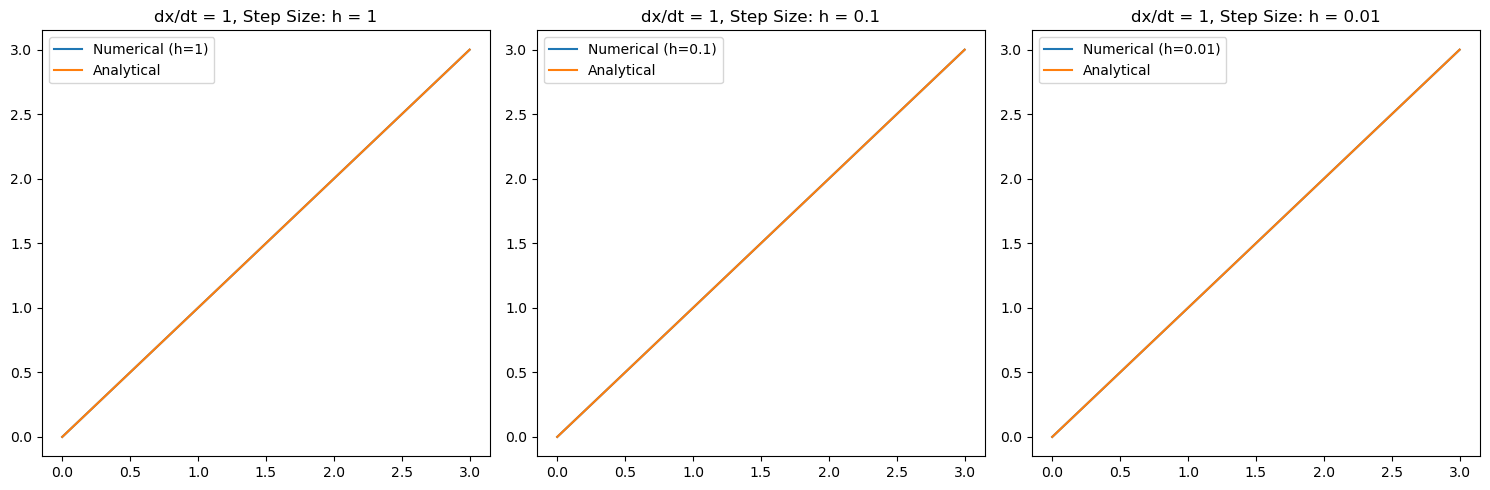

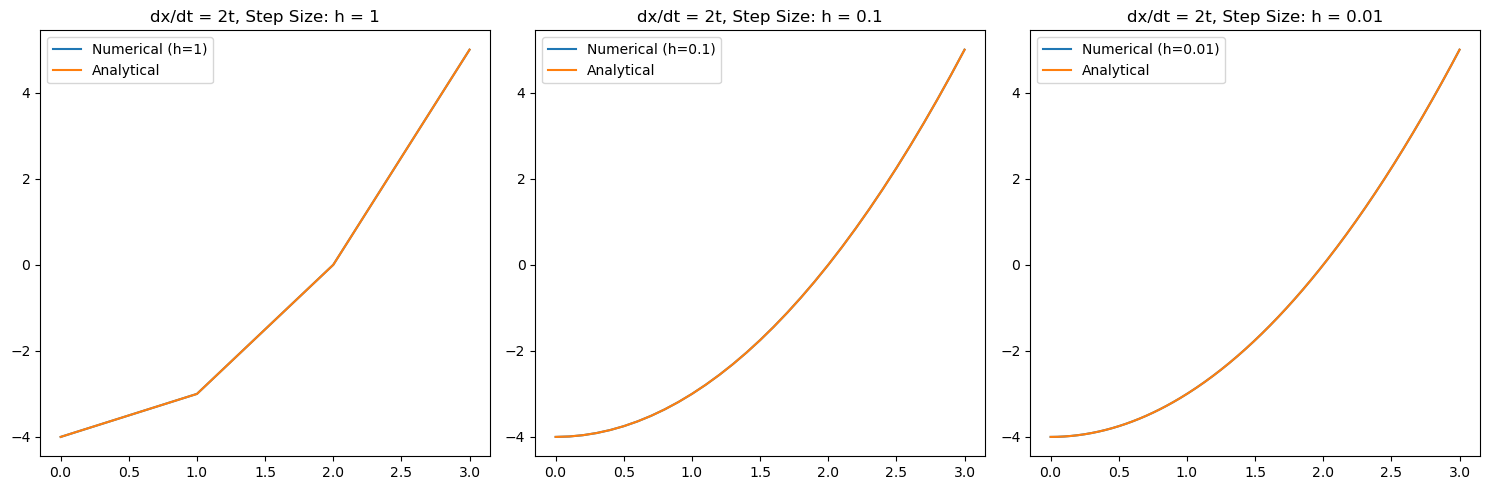

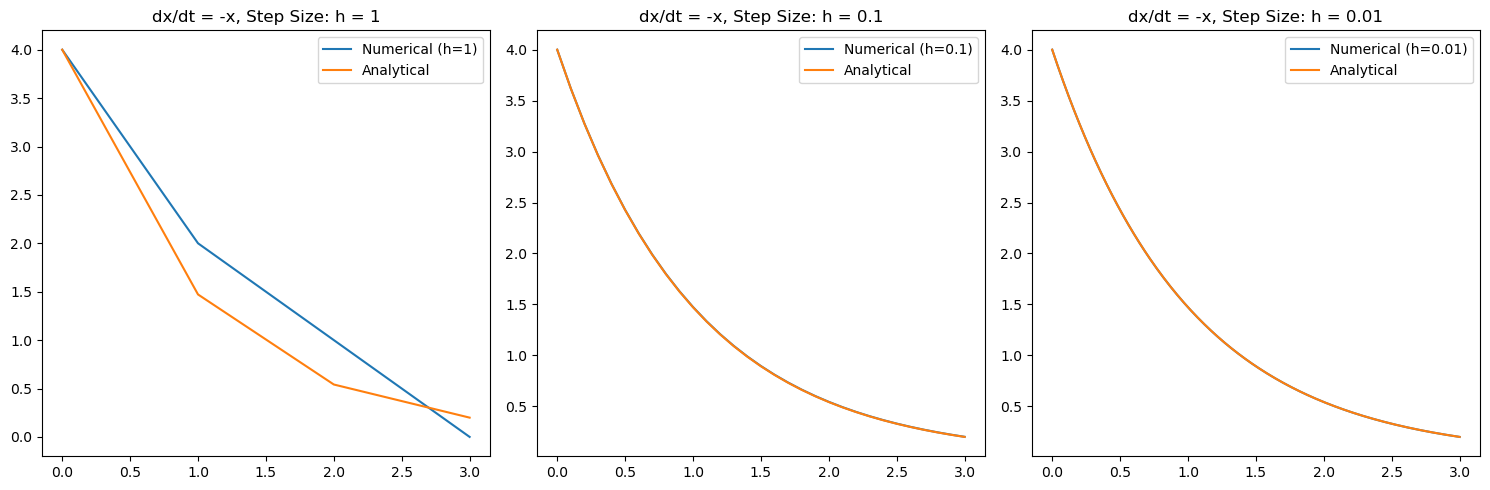

In [4]:
def runge_kutta_2nd_order(f, x0, t0, T, h):
    t_values = np.arange(t0, T + h, h)
    x_values = np.zeros_like(t_values)
    x_values[0] = x0

    for i in range(1, len(t_values)):
        k1 = h * f(x_values[i - 1], t_values[i - 1])
        k2 = h * f(x_values[i - 1] + k1, t_values[i - 1] + h)
        x_values[i] = x_values[i - 1] + 0.5 * (k1 + k2)

    return t_values, x_values

# dx/dt = 1
plt.figure(figsize=(15, 5))

for idx, h in enumerate(h_values):
    plt.subplot(1, len(h_values), idx + 1)

    t_values1, x_values1 = runge_kutta_2nd_order(f1, 0, t0, T, h)
    analytical_values1 = analytical_solution1(t_values1)

    plt.plot(t_values1, x_values1, label=f'Numerical (h={h})')
    plt.plot(t_values1, analytical_values1, label='Analytical')
    plt.title(f'dx/dt = 1, Step Size: h = {h}')
    plt.legend()

plt.tight_layout()
plt.show()

# dx/dt = 2t
plt.figure(figsize=(15, 5))

for idx, h in enumerate(h_values):
    plt.subplot(1, len(h_values), idx + 1)

    t_values2, x_values2 = runge_kutta_2nd_order(f2, -4, t0, T, h)
    analytical_values2 = analytical_solution2(t_values2)

    plt.plot(t_values2, x_values2, label=f'Numerical (h={h})')
    plt.plot(t_values2, analytical_values2, label='Analytical')
    plt.title(f'dx/dt = 2t, Step Size: h = {h}')
    plt.legend()

plt.tight_layout()
plt.show()

# dx/dt = -x
plt.figure(figsize=(15, 5))

for idx, h in enumerate(h_values):
    plt.subplot(1, len(h_values), idx + 1)

    t_values3, x_values3 = runge_kutta_2nd_order(f3, 4, t0, T, h)
    analytical_values3 = analytical_solution3(t_values3)

    plt.plot(t_values3, x_values3, label=f'Numerical (h={h})')
    plt.plot(t_values3, analytical_values3, label='Analytical')
    plt.title(f'dx/dt = -x, Step Size: h = {h}')
    plt.legend()

plt.tight_layout()
plt.show()


4. (Analytical) Consider the concentration of a specific protein over time in a biological cell,
denoted x(t). Assume that these protein molecules are generated at a constant rate (increasing the concentration). Each protein also has a constant rate at which it degrades
(decreasing the concentration). Thus we can model this simple system by the ODE
dx
dt = g − k · x

(a) (Analytical) Mention briefly the role of g and the role of k in this model.

(b) (Analytical) Find an explicit solution for x(t) in the general case.


(c) Your solution should include an additional constant that is currently unknown. What
is the role of this constant?


(d) (Analytical) Now solve this ODE assuming the initial condition: x(0) = 0. In the
remaining questions we will assume this solution.

(e) (Analytical) Plot the following four curves of x(t) versus t in the same figure, over
the range 0 ≤ t ≤ 5. (Can you already guess how g and k determine the long-term
behavior?)
• g = 2, k = 3
• g = 1, k = 1.5
• g = 2, k = 2
• g = 1, k = 1


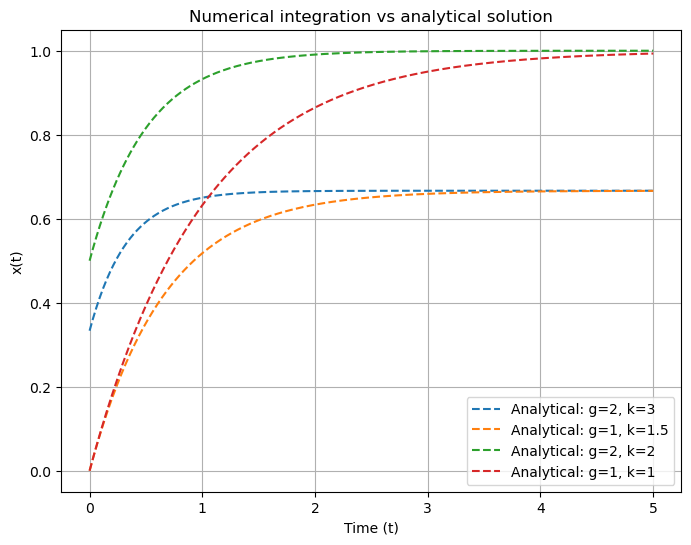

In [9]:
def dx_dt(x, g, k):
    return g - k * x

def euler_method(g, k, x0, t0, T, h):
    t_values = np.arange(t0, T + h, h)
    x_values = np.zeros_like(t_values)
    x_values[0] = x0

    for i in range(1, len(t_values)):
        x_values[i] = x_values[i - 1] + h * dx_dt(x_values[i - 1], g, k)

    return t_values, x_values

parameters = [
    (2, 3),
    (1, 1.5),
    (2, 2),
    (1, 1)
]

# Analytical solutions for x(t)
def x_t_analytical(t, g, k):
    return (g - np.exp(-k * t)) / k

h = 0.1 / min([k for _, k in parameters])

plt.figure(figsize=(8, 6))

for g, k in parameters:
    t_values_num, x_values_num = euler_method(g, k, 0, 0, 5, h)
    #plt.plot(t_values_num, x_values_num, label=f'Numerical: g={g}, k={k}')
    
    t_values_analytical = np.linspace(0, 5, 500)
    x_values_analytical = x_t_analytical(t_values_analytical, g, k)
    plt.plot(t_values_analytical, x_values_analytical, label=f'Analytical: g={g}, k={k}', linestyle='dashed')

plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Numerical integration vs analytical solution')
plt.legend()
plt.grid(True)
plt.show()

(f) (Numerical) Check the above results by numerical integration. Use a time step less
than 0.1/k.

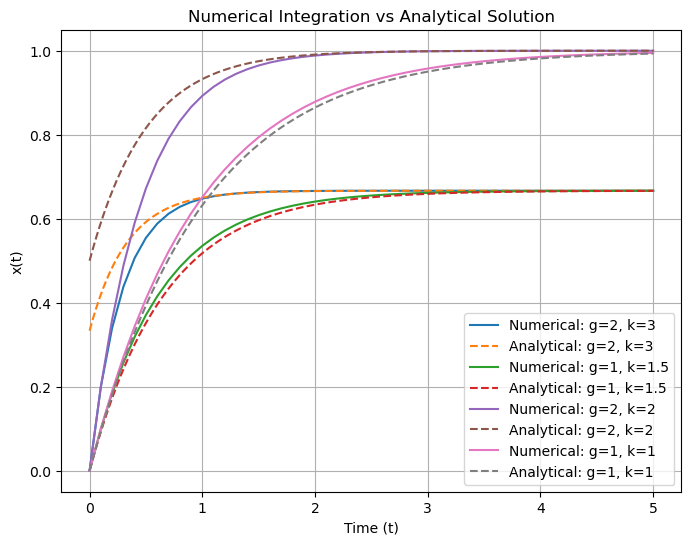

In [8]:
# Analytical solutions for x(t)
def x_t_analytical(t, g, k):
    return (g - np.exp(-k * t)) / k

h = 0.1 / min([k for _, k in parameters])

plt.figure(figsize=(8, 6))

for g, k in parameters:
    t_values_num, x_values_num = euler_method(g, k, 0, 0, 5, h)
    plt.plot(t_values_num, x_values_num, label=f'Numerical: g={g}, k={k}')
    
    t_values_analytical = np.linspace(0, 5, 500)
    x_values_analytical = x_t_analytical(t_values_analytical, g, k)
    plt.plot(t_values_analytical, x_values_analytical, label=f'Analytical: g={g}, k={k}', linestyle='dashed')

plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Numerical Integration vs Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()

(g) (Analytical) Derive the expression for the fixed point(s) to which x(t) settles in general, so in terms of g and k.

(h) (Analytical) Plot dx/dt versus x(t) for the values g = 2 and k = 3. Try a few other
parameter values yourself. Use this figure to explain whether this ODE is unstable,
locally stable, or globally stable

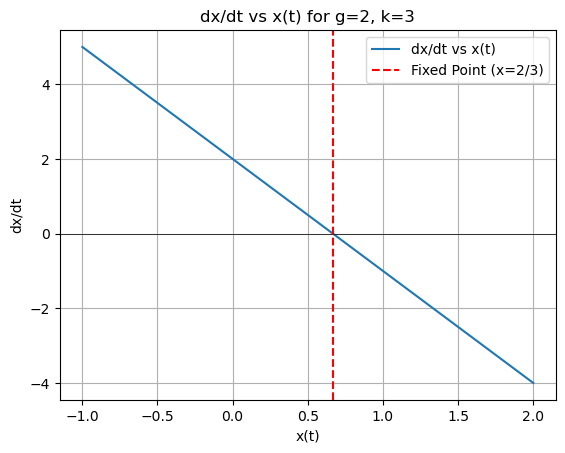

In [20]:
x_values = np.linspace(-1, 2, 100)
g, k = 2, 3

dx_dt_values = dx_dt(x_values, g, k)

plt.plot(x_values, dx_dt_values, label='dx/dt vs x(t)')
plt.xlabel('x(t)')
plt.ylabel('dx/dt')
plt.title('dx/dt vs x(t) for g=2, k=3')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(g/k, color='red', linestyle='--', label='Fixed Point (x=2/3)')
plt.legend()
plt.grid(True)
plt.show()


(i) (Thought experiment) Suppose that g can now change over time, that is, g(t) is now a
function of time t. Suppose that at time t = t0 the stable concentration of the protein
is too low for the purpose of the cell. Biological cells can adapt to such situations. In
this example, the cell can do nothing to change k since the decay rate depends on the
chemistry of the protein molecule. But it can change the rate at which it produces
new protein molecules, g. Assume that the cell can freely change g over time in order
to make the new stable concentration, say, 100% higher. Sketch manually a possible
graph of g over time of how the cell could achieve its goal, and explain its features.
(Can you find a second possible shape, depending on how ’opportunistic’ the cell
changes g?)


(j) (Explain) Explain briefly why you think this model is called a ’mean-field’ or ’meanfield approximation’ model.
